#Titanic dataset

# 0. Load Data

In [18]:
!git clone https://github.com/Burdin84/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [19]:
!ls

 911.csv		     datasets		        lending_club_info.csv
 advertising.csv	    'Ecommerce Customers'       loan_data.csv
 cancer_classification.csv  'Ecommerce Customers.csv'   titanic.csv
'Classified Data'	     fake_reg.csv	        winequality-red.csv
 College_Data		     kc_house_data.csv


In [20]:
cd datasets/

/content/datasets/datasets


In [21]:
!ls
!pwd

 911.csv		    'Ecommerce Customers'       loan_data.csv
 advertising.csv	    'Ecommerce Customers.csv'   titanic.csv
 cancer_classification.csv   fake_reg.csv	        winequality-red.csv
'Classified Data'	     kc_house_data.csv
 College_Data		     lending_club_info.csv
/content/datasets/datasets


# 1. Import of Libraries

In [22]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#sets matplotlib inline and display graphs below the corresponding cell
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
#evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #for regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #for classification

from scipy import stats
from scipy.stats import norm, skew #for some statistics

#Plotly Libraries
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots



# 2. Read data

In [23]:
df = pd.read_csv("/content/datasets/titanic.csv")

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. General description
---------------------------------------------------

Description of columns

|Column Name|Description|Details|
|-----------|-----------|-------|
PassengerId | Passenger Identity
Survived | Whether passenger survived or not| 0 = No, 1 = Yes
Pclass | Class of ticket | 1 = 1st, 2 = 2nd, 3 = 3rd
Name | Name of passenger
Sex | Sex of passenger| 0 = female, 1 = male
Age | Age of passenger
SibSp | Number of sibling and/or spouse travelling with passenger
Parch | Number of parent and/or children travelling with passenger
Ticket | Ticket number
Fare | Price of ticket
Cabin | Cabin number
Embark| Port of Embarkation| C = Cherbourg, Q = Queenstown, S = Southampton

In [25]:
for col in list(df.columns):
    print(f"Unique values in {col}: {len(list(df[col].dropna().unique()))}\n{sorted(list(df[col].dropna().unique()))}\n")

Unique values in PassengerId: 891
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Get number of NaNs

In [27]:
df.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see missing values in Age column, Cabin column and Embark column.

Embarked column shouldn't be a big deal, it's just 2 values, most of people were embarking at Southampton, so we can presume this 2 missing values are from same port.

###Filling NaNs values

In [28]:
df["Embarked"] = df["Embarked"].fillna("S")
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

There is 177 missing values in Age column. \
We can put there mean values of all passengers, but this wouldn't help much.
So, for this we can presume that people with same title will be in similar age group. This is not exactly true, but it can help a little with more precise age filling. \
To eliminate extremes we will use median() function.

In [29]:
for name_string in df['Name']:
    df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=True)


mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

In [30]:
df.groupby('Title')["Age"].median()

Title
Dr        46.5
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.0
Rev       46.5
Name: Age, dtype: float64

In [31]:
titles = ['Mr','Miss','Mrs','Master','Rev','Dr']
for title in titles:
  age_est = df.groupby("Title")["Age"].median()[titles.index(title)]
  df.loc[(df["Age"].isnull()) & (df["Title"] == title), 'Age'] = age_est
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

Now we're missing just the Cabin number. \
To fill this information can be to tricky, so it will be probably better to drop this column at all and use just information about passenger class

# 4. Visualisation of dataset

**Survivors according to the sex**

In [32]:
data = df
data['Died'] = 1 - data['Survived']
fig = go.Figure(data=[
    go.Bar(name='Survived', x=data['Sex'], y=[data[data.Sex==data['Sex'][0]]['Survived'].agg(sum), data[data.Sex==data['Sex'][1]]['Survived'].agg(sum)], marker_color='blue', opacity=0.75),
    go.Bar(name='Died', x=data['Sex'], y=[data[data.Sex==data['Sex'][0]]['Died'].agg(sum), data[data.Sex==data['Sex'][1]]['Died'].agg(sum)], marker_color='orange', opacity=0.75)
])
fig.update_layout(barmode='stack', width=600, title_text='Survivors categorized as Male/Female', xaxis_title_text='Sex', yaxis_title_text='Number of passangers')
fig.show()

In [33]:
fig = go.Figure(data=[
    go.Bar(name='Survived', x=data['Sex'], y=[data[data.Sex==data['Sex'][0]]['Survived'].agg(sum), data[data.Sex==data['Sex'][1]]['Survived'].agg(sum)], marker_color='blue', opacity=0.75),
    go.Bar(name='Died', x=data['Sex'], y=[data[data.Sex==data['Sex'][0]]['Died'].agg(sum), data[data.Sex==data['Sex'][1]]['Died'].agg(sum)], marker_color='orange', opacity=0.75)
])
fig.update_layout(barmode='stack', width=600, title_text='Survivors categorized as Male/Female', xaxis_title_text='Sex', yaxis_title_text='Number of passangers')
fig.show()

**Survivors according to the Fare and Age**

In [34]:
data['Survived'] = data['Survived'].astype(str)
fig_scatter = px.scatter(data, x='Fare', y='Age', color='Survived', facet_col='Sex')
fig_scatter.update_layout(width=800, title_text='Survivors categorized as Male/Female', yaxis_title_text='Age of passangers')
fig_scatter.show()

data['Survived'] = data['Survived'].astype(int)

**Survivors according based on fare**

In [35]:
fig_hist = go.Figure()
fig_hist.add_trace(go.Histogram(x=data[data['Survived']==1]['Fare'], name='Survived', marker_color='blue', opacity=0.75))
fig_hist.add_trace(go.Histogram(x=data[data['Died']==1]['Fare'], name='Died', marker_color='orange', opacity=0.75))
fig_hist.update_layout(barmode='stack', title_text='Histogram representing relation between Survivor/Dead with Fare',
                       xaxis_title_text='Fare', yaxis_title_text='Number of Passangers', bargap=0.2)
fig_hist.show()

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


Text(0.5, 1.0, 'Correlation among Features')

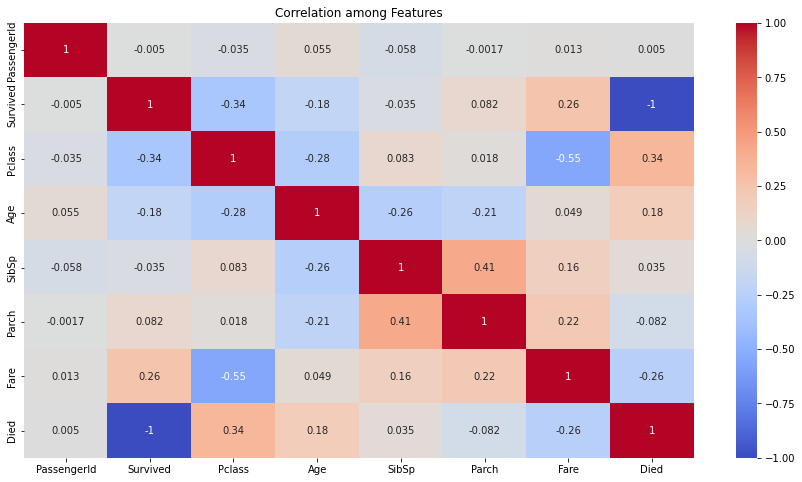

In [37]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation among Features")

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


# 5. Creating new categories

**Based on family size**

In [39]:
#creating funtion for creating categories based on family size
def family_size():
    global df
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
    #feature to decide family size
    df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    df['SmallFamily'] = df['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    df['LargeFamily'] = df['FamilySize'].map(lambda s: 1 if 5 <= s <= 8 else 0)
    return df

In [40]:
df = family_size()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Died,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,2,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,2,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,1,0,0


**Based on embarked location**

In [41]:
#creating function for creating categories based on embarked location and droping original Embarked column
def embarked():
    global df
    df['Embarked'].fillna('S', inplace=True)
    df_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = pd.concat([df, df_dummies], axis=1)
    df.drop('Embarked', axis=1, inplace=True)
    return df

In [42]:
df = embarked()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Died,FamilySize,Singleton,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr,1,2,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs,0,2,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,1,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs,0,2,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr,1,1,1,0,0,0,0,1


**Changing sex values from string to integer**

In [43]:
df['Sex'] = df.Sex.apply(lambda x: 0 if x == "female" else 1)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Died,FamilySize,Singleton,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,Mr,1,2,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,Mrs,0,2,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,1,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,Mrs,0,2,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,Mr,1,1,1,0,0,0,0,1


**Creating categories based on Fare of passangers**

Values of Fare are too wide spread, in mz opinion it will be better to put them into just few categories

In [45]:
#converting fare to interger values and then into categories
df.loc[df['Fare'] <= 7, 'Fare'] = 0
df.loc[(df['Fare'] > 7) & (df['Fare'] <= 14), 'Fare'] = 1
df.loc[(df['Fare'] > 14) & (df['Fare'] <= 31), 'Fare'] = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare'] = 3
df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare'] = 4
df.loc[df['Fare'] >= 250, 'Fare'] = 5
df['Fare'] = df['Fare'].astype(int)
#distribution
df['Fare'].value_counts()

1    409
2    232
3    169
4     44
0     28
5      9
Name: Fare, dtype: int64

Text(0.5, 1.0, 'Correlation among Features')

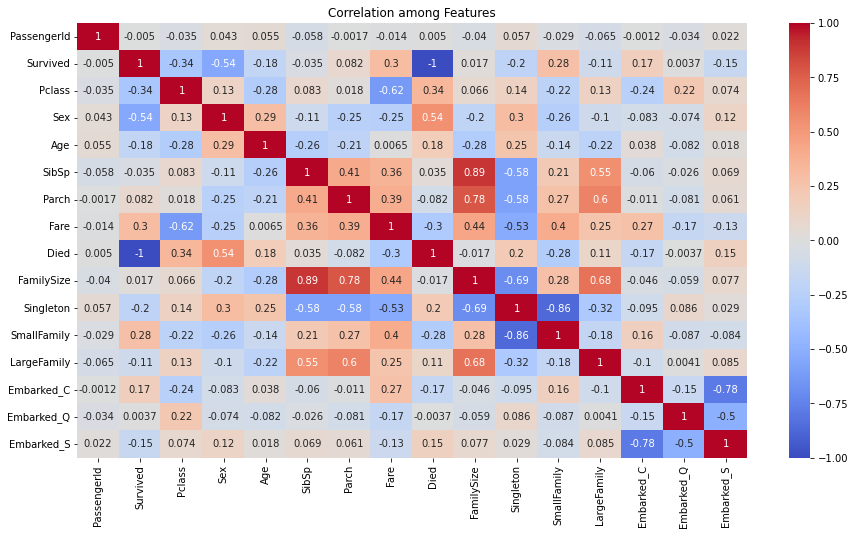

In [46]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation among Features")

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Died,FamilySize,Singleton,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1,NaN,Mr,1,2,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,3,C85,Mrs,0,2,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,1,NaN,Miss,0,1,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3,C123,Mrs,0,2,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,1,NaN,Mr,1,1,1,0,0,0,0,1


# 6. Train test split

In [48]:
input_variables = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare', 'Singleton', 'SmallFamily', 'LargeFamily', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
y = ['Survived']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[input_variables], 
                                                    df["Survived"], stratify = df["Survived"], 
                                                    test_size=0.20, random_state=42, shuffle=True)

In [50]:
#def final_score(train, test):
  

# 7. Models

In [51]:
def classify (method, result_list):

  method.fit(X_train, y_train)

  y_train_method = method.predict(X_train)
  y_test_method = method.predict(X_test)

  method_accuracy_train = accuracy_score(y_train, y_train_method)
  method_accuracy_test = accuracy_score(y_test, y_test_method)

  method_precision_train = precision_score(y_train, y_train_method)
  method_precision_test = precision_score(y_test, y_test_method)

  method_recall_train = recall_score(y_train, y_train_method)
  method_recall_test = recall_score(y_test, y_test_method)

  method_f1_train = f1_score(y_train, y_train_method)
  method_f1_test = f1_score(y_test, y_test_method)

  print(f'Train accuracy: {round(method_accuracy_train*100, 2)} and Test accuracy: {round(method_accuracy_test*100,2)}')
  print(f'Train Precision: {round(method_precision_train*100,2)} and Test Precision: {round(method_precision_test*100,2)}')
  print(f'Train Recall: {round(method_recall_train*100,2)} and Test Recall: {round(method_recall_test*100,2)}')
  print(f'Train F1-Score: {round(method_f1_train*100,2)} and Test F1-Score: {round(method_f1_test*100,2)}')

  result_list.append(method_accuracy_train)
  result_list.append(method_accuracy_test)
  result_list.append(method_precision_train)
  result_list.append(method_precision_test)
  result_list.append(method_recall_train)
  result_list.append(method_recall_test)
  result_list.append(method_f1_train)
  result_list.append(method_f1_test)

###Random forest classifier

In [52]:
random_forest = RandomForestClassifier()
forest_result = []

classify(random_forest, forest_result)

Train accuracy: 94.52 and Test accuracy: 79.33
Train Precision: 94.66 and Test Precision: 72.86
Train Recall: 90.84 and Test Recall: 73.91
Train F1-Score: 92.71 and Test F1-Score: 73.38


### Logistic Regression

In [53]:
log_regres = LogisticRegression(solver = "liblinear", penalty = "l1")
log_result = []

classify(log_regres, log_result)

Train accuracy: 81.18 and Test accuracy: 82.68
Train Precision: 77.69 and Test Precision: 80.65
Train Recall: 71.43 and Test Recall: 72.46
Train F1-Score: 74.43 and Test F1-Score: 76.34


### Gaussian Naive Bayes model

In [54]:
gaussian = GaussianNB()
gauss_result = []

classify(gaussian, gauss_result)


Train accuracy: 77.81 and Test accuracy: 74.3
Train Precision: 68.37 and Test Precision: 64.2
Train Recall: 78.39 and Test Recall: 75.36
Train F1-Score: 73.04 and Test F1-Score: 69.33


### K-nearest Neighbours

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_result = []

classify(knn, knn_result)





Train accuracy: 84.83 and Test accuracy: 70.95
Train Precision: 82.61 and Test Precision: 64.91
Train Recall: 76.56 and Test Recall: 53.62
Train F1-Score: 79.47 and Test F1-Score: 58.73


### Support Vector Machine model

In [56]:
svc = LinearSVC()
svc_result = []

classify(svc, svc_result)

Train accuracy: 82.58 and Test accuracy: 79.33
Train Precision: 85.31 and Test Precision: 82.0
Train Recall: 65.93 and Test Recall: 59.42
Train F1-Score: 74.38 and Test F1-Score: 68.91


### Decision tree model

In [57]:
tree = DecisionTreeClassifier()

tree_result = []

classify(tree, tree_result)

Train accuracy: 94.52 and Test accuracy: 77.65
Train Precision: 98.35 and Test Precision: 73.02
Train Recall: 87.18 and Test Recall: 66.67
Train F1-Score: 92.43 and Test F1-Score: 69.7


###Results

In [58]:
fig = go.Figure(data=[go.Table(header=dict(values=['Model', 'Accuracy_Train', "Accuracy_Test"]),
                 cells=dict(values=[['Random Forest','Logistic Regression','K-Nearest Neighbour','Gaussian Naive Bayes','SVM','Decision Tree'], 
                                    [round(forest_result[0],2),round(log_result[0],2),round(knn_result[0], 2), round(gauss_result[0],2), round(svc_result[0],2),round(tree_result[0],2)],
                                    [round(forest_result[1],2),round(log_result[1],2),round(knn_result[1], 2), round(gauss_result[1],2), round(svc_result[1],2),round(tree_result[1],2)]]))
                     ])
fig.show()

So RandomForest and DecisionTree has best result, but this can be because they are overfitted, rest of methods have similar results... \
Maybe it will be good to use GridSearch and find best parameters for all methods

In [59]:
rf = RandomForestClassifier()
scores_train = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
scores_test = cross_val_score(rf, X_test, y_test, cv=10, scoring='accuracy')

print("Scores:", scores_train, scores_test)
print("Mean:", scores_train.mean(), scores_test.mean())
print("Standard Deviation:", scores_train.std(), scores_test.std())

Scores: [0.75       0.79166667 0.78873239 0.67605634 0.8028169  0.81690141
 0.85915493 0.77464789 0.74647887 0.8028169 ] [0.66666667 0.77777778 0.55555556 0.55555556 0.77777778 0.83333333
 0.83333333 0.72222222 0.61111111 0.88235294]
Mean: 0.7809272300469484 0.7215686274509805
Standard Deviation: 0.046614164137322604 0.11291121606970955


# 8. GridSearch method

I'm lazy, so first I will prepare some functions which I can call for all methods

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - results for each class separately
#   'binary' - for the label selected in `pos_label`
#   'micro' - for total number of TP, FN, FP
#   'macro' - unweighted average for each class
#   'weighted' - weighted average for each class

def calculate_metrics(target, prediction, result_list, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    result_list.append(round(accuracy, 2))
    result_list.append(round(precision, 2))
    result_list.append(round(recall, 2))   
    result_list.append(round(f1, 2))

    return accuracy, precision, recall, f1, mislabeled, total

#nice print of all metrics
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {round(metrics[0],2)}')
    print(f'  Precision: {round(metrics[1], 2)}')
    print(f'  Recall:    {round(metrics[2], 2)}')
    print(f'  F1 score:  {round(metrics[3], 2)}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

  

def get_grid(data):
    """Function that creates a grid of data used for background coloring"""
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

def grid_search(model, parameters, result_list):
  # Instantiate the GridSearchCV object and run the search
  
  searcher = GridSearchCV(model, parameters)
  searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score for training data
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)
  model_param = searcher.best_params_

  print_results(calculate_metrics(y_train, searcher.best_estimator_.predict(X_train), result_list), f'{model} train set')

  searcher.fit(X_test, y_test)

# Report the best parameters and the corresponding score for test data
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)


  print_results(calculate_metrics(y_test, searcher.best_estimator_.predict(X_test), result_list), f'{model} test set')    

### SVM

In [61]:
# Instantiate an RBF SVM
svm = SVC(kernel="rbf")
svm_result = []
# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.01, 0.1, 1, 10, 100, 200, 250, 300], 'gamma' : [0.0005, 0.001, 0.015, 0.022, 0.021, 0.023, 0.025, 0.03, 0.04]}

grid_search(svm, parameters, svm_result)

Best CV params {'C': 250, 'gamma': 0.0005}
Best CV accuracy 0.8244952230867723
Results for SVC() train set
----
  Accuracy:  0.83
  Precision: 0.82
  Recall:    0.83
  F1 score:  0.82
  Mislabeled 124 out of 712


Best CV params {'C': 300, 'gamma': 0.0005}
Best CV accuracy 0.8104761904761905
Results for SVC() test set
----
  Accuracy:  0.82
  Precision: 0.82
  Recall:    0.82
  F1 score:  0.81
  Mislabeled 33 out of 179




In [62]:
svm_result

[0.83, 0.82, 0.83, 0.82, 0.82, 0.82, 0.82, 0.81]

### Logistic Regression

In [63]:
# Instantiate an Logistic Regression
log_regres = LogisticRegression()
log_results = []

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.01, 0.1, 1, 10, 100, 200, 250, 300], "penalty":["l1", "l2"]}
grid_search(log_regres, parameters, log_results)

Best CV params {'C': 100, 'penalty': 'l2'}
Best CV accuracy 0.8147247119078104
Results for LogisticRegression() train set
----
  Accuracy:  0.81
  Precision: 0.81
  Recall:    0.81
  F1 score:  0.81
  Mislabeled 134 out of 712


Best CV params {'C': 10, 'penalty': 'l2'}
Best CV accuracy 0.7879365079365079
Results for LogisticRegression() test set
----
  Accuracy:  0.82
  Precision: 0.81
  Recall:    0.82
  F1 score:  0.81
  Mislabeled 33 out of 179




### Random Forest

In [64]:
random_forest = RandomForestClassifier()
forest_results = []

# Instantiate the GridSearchCV object and run the search
parameters = {"n_estimators":[1, 2, 3, 4 ,5, 10, 50, 100], "max_depth":[1, 2, 3, 4 ,5, 10, 50, 100], "criterion": ["gini", "entropy", "log_loss"] }
grid_search(random_forest, parameters, forest_results)

Best CV params {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}
Best CV accuracy 0.8329360780065006
Results for RandomForestClassifier() train set
----
  Accuracy:  0.85
  Precision: 0.85
  Recall:    0.85
  F1 score:  0.85
  Mislabeled 107 out of 712


Best CV params {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 5}
Best CV accuracy 0.7993650793650793
Results for RandomForestClassifier() test set
----
  Accuracy:  0.85
  Precision: 0.85
  Recall:    0.85
  F1 score:  0.85
  Mislabeled 27 out of 179




### Decision Tree

In [65]:
tree = DecisionTreeClassifier()
tree_results = []

# Instantiate the GridSearchCV object and run the search
parameters = { "max_depth":[1, 2, 3, 4 ,5, 10, 50, 100], "criterion": ["gini", "entropy", "log_loss"] }
grid_search(tree, parameters, tree_results)

Best CV params {'criterion': 'entropy', 'max_depth': 4}
Best CV accuracy 0.8189008174923668
Results for DecisionTreeClassifier() train set
----
  Accuracy:  0.83
  Precision: 0.85
  Recall:    0.83
  F1 score:  0.82
  Mislabeled 119 out of 712


Best CV params {'criterion': 'gini', 'max_depth': 3}
Best CV accuracy 0.7825396825396825
Results for DecisionTreeClassifier() test set
----
  Accuracy:  0.83
  Precision: 0.83
  Recall:    0.83
  F1 score:  0.83
  Mislabeled 30 out of 179




### KNN

In [66]:
knn = KNeighborsClassifier()
knn_results = []

# Instantiate the GridSearchCV object and run the search
parameters = {"n_neighbors":[1, 2, 3, 4 ,5, 9, 10, 11, 50, 100], "weights":["uniform", "distance"], "algorithm":["auto", "ball_tree", "kd_tree", "brute"], "leaf_size":[1, 2, 3, 4, 5, 10, 20, 50, 100 ] }
grid_search(knn, parameters, knn_results)

Best CV params {'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 10, 'weights': 'distance'}
Best CV accuracy 0.7711415345218162
Results for KNeighborsClassifier() train set
----
  Accuracy:  0.95
  Precision: 0.95
  Recall:    0.95
  F1 score:  0.94
  Mislabeled 39 out of 712


Best CV params {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 3, 'weights': 'distance'}
Best CV accuracy 0.721111111111111
Results for KNeighborsClassifier() test set
----
  Accuracy:  0.98
  Precision: 0.98
  Recall:    0.98
  F1 score:  0.98
  Mislabeled 4 out of 179




### Grid search results

In [67]:
fig = go.Figure(data=[go.Table(header=dict(values=['Model', 'Accuracy_Train', "Accuracy_Test"], align = 'left'),
                 cells=dict(values=[['Random Forest','Logistic Regression','K-Nearest Neighbour','SVM','Decision Tree'], 
                                    [round(forest_results[0],2),round(log_results[0],2),round(knn_results[0], 2),  round(svm_result[0],2),round(tree_results[0],2)],
                                    [round(forest_results[4],2),round(log_results[4],2),round(knn_results[4], 2),  round(svm_result[4],2),round(tree_results[4],2)]],  align = 'left'))
                     ])
fig.show()


In [68]:

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.70833333 0.76388889 0.73239437 0.73239437 0.77464789 0.78873239
 0.77464789 0.76056338 0.70422535 0.76056338]
Mean: 0.7500391236306729
Standard Deviation: 0.027536588731827277


In [70]:

scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring='accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75       0.79166667 0.8028169  0.69014085 0.81690141 0.83098592
 0.85915493 0.77464789 0.74647887 0.8028169 ]
Mean: 0.7865610328638498
Standard Deviation: 0.045935411986003545


### Final results and conclusion

After runing Cross validation for two models with best accuracy score, it looks like Random forest model performs slightly better

In [71]:
random_forest.fit(X_train, y_train)
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances_df = importances.sort_values('Importance', ascending=False).reset_index(drop=True)
importances_plot = importances.sort_values('Importance', ascending=False).set_index('Feature')
importances_plot.head()

,Importance
Feature,
Age,0.332
Sex,0.264
Pclass,0.112
Fare,0.100
FamilySize,0.043


In [72]:
#Plotting the Features importances
fig_bar_feature = go.Figure()
fig_bar_feature.add_trace(go.Bar(x=importances_df['Feature'], y=importances_df['Importance']))
fig_bar_feature.update_layout(width=800, title_text='Bar chart representing Importances of Features',
                       xaxis_title_text='Features', yaxis_title_text='Importance', xaxis_tickangle=-45)
fig_bar_feature.show()

On the chart above we can see what features were, probably, most important for survival of this shipwreck

As a most important feature looks it is Age, it's hard to say if it was because of health condition or older people gives priority to younger people or zounger people were faster ... ?

From my point of view, more important features  were Sex, Pclass and Fare.

Obviously more women survived this crash, in my guess it's because "Children and woman first" naval rule

Also Pasenger class and Fare are connected together, higher Fare means higher Passenger class, higher survivability rate with high probability rate given by the fact that first class was on the higher decks of Titanic, so these passengers had better access to the lifeboats

#So best survival probability was for rich young woman or man :)


This was my first bigger project which also forced me to use more different models and approaches, also it enhanced my understanding of Machine learning 